In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

num_words = 10000
max_review_len = 100
csv_path = '../build/data3.csv'
model_save_path = '../build/best_model.h5'

In [33]:
train = pd.read_csv(csv_path)
reviews = train['review']

In [34]:
y_train = train['helpful']
y_train

0        0
1        1
2        0
3        0
4        0
        ..
65539    1
65540    1
65541    0
65542    1
65543    0
Name: helpful, Length: 65544, dtype: int64

In [35]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(reviews)
with open('../build/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
#check
sequences = tokenizer.texts_to_sequences(reviews)
x_train = pad_sequences(sequences, maxlen=max_review_len)
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  589,
           4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [37]:
#net
model = Sequential()
model.add(Embedding(num_words, 2, input_length=max_review_len))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [40]:
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 58989 samples, validate on 6555 samples
Epoch 1/5
58989/58989 [==============================] - 27s 466us/step - loss: 0.6743 - accuracy: 0.5719 - val_loss: 0.6131 - val_accuracy: 0.6744

Epoch 00001: val_accuracy improved from -inf to 0.67445, saving model to ../build/best_model.h5
Epoch 2/5
58989/58989 [==============================] - 23s 389us/step - loss: 0.5865 - accuracy: 0.6948 - val_loss: 0.5828 - val_accuracy: 0.6979

Epoch 00002: val_accuracy improved from 0.67445 to 0.69794, saving model to ../build/best_model.h5
Epoch 3/5
58989/58989 [==============================] - 24s 403us/step - loss: 0.5466 - accuracy: 0.7263 - val_loss: 0.5755 - val_accuracy: 0.7016

Epoch 00003: val_accuracy improved from 0.69794 to 0.70160, saving model to ../build/best_model.h5
Epoch 4/5
58989/58989 [==============================] - 27s 456us/step - loss: 0.5272 - accuracy: 0.7398 - val_loss: 0.5848 - val_accuracy: 0.6917

Epoch 00004: val_accuracy did not improve from 0.70160
Epoch 

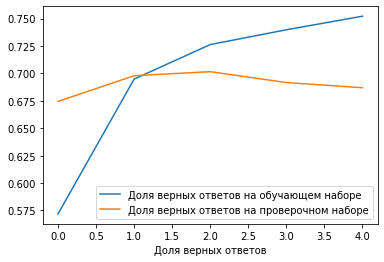

In [41]:
plt.plot(history.history['accuracy'],
         label = "Доля верных ответов на обучающем наборе")
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.xlabel('Доля верных ответов')
plt.legend()
plt.show()